**NADIA NUR OKTAVIANISUKMA - 202010370311320**

import pandas as pd, digunakan untuk manipulasi dan analisis data tabular, seperti data dalam bentuk spreadsheet.

import networkx as nx: digunakan untuk analisis jaringan dan graf. Ini berguna untuk memodelkan dan menganalisis jaringan atau graf yang terdiri dari simpul-simpul (nodes) dan tepi-tepi (edges).

import matplotlib.pyplot as plt: digunakan untuk membuat visualisasi seperti grafik, plot, dan grafik lainnya. Dengan 'plt', Anda dapat membuat plot yang akan digunakan untuk menampilkan data secara visual.

import seaborn as sns: digunakan untuk membuat visualisasi data yang lebih menarik dan informatif dengan mudah. Seaborn adalah salah satu alat yang digunakan bersama dengan Matplotlib untuk visualisasi data.







In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

Tujuan analisis ini adalah untuk menganalisis pola koneksi TCP antara Sumber (Source) dan Destinasi (Destination) dengan fokus pada koneksi yang memiliki Label 0 (tidak ada TCP Dup ACK) dan Label 1 (TCP Dup ACK). Memahami perbedaan karakteristik waktu (Time), panjang koneksi (Length), dan informasi terkait (Info) antara koneksi dengan Label 0 dan Label 1

## **PREPROCESSING**

Kode ini digunakan untuk menghubungkan dan mengaitkan Google Drive dengan Google Colab. Dengan mengaitkan dengan Google Drive, disini saya dapat mengakses dan menyimpan berkas atau data yang ada di Google Drive Anda langsung dari Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode dibawh digunakan untuk mengatur environment variable KAGGLE_CONFIG_DIR dengan nilai /content/drive/MyDrive/AnalisisBigdata/datajaringan. Ini biasanya digunakan ketika ingin menentukan lokasi direktori yang berisi konfigurasi Kaggle API di Google Colab.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/AnalisisBigdata/datajaringan'

Kode dibawah digunakan untuk membaca berkas CSV (Comma-Separated Values) dari direktori yang telah ditentukan dan memuatnya ke dalam objek DataFrame menggunakan perpustakaan Pandas di lingkungan Google Colab.

In [ ]:
# Define the train and test data
data_jaringan = pd.read_csv('/content/drive/MyDrive/AnalisisBigdata/datajaringan/Datajaringan7A.csv')

code dibawah untuk menampilkan data yang ada didalam dataFrame



In [ ]:
# menampilkan 5 data teratas

data_jaringan.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
1,2,0.000588,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
2,3,0.000745,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
3,4,0.001275,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record
4,5,0.002002,10.10.1.198,172.217.194.95,TLSv1.2,64468,Ignored Unknown Record


In [ ]:
# menampilkan 5 data terbawah

data_jaringan.tail()

,No.,Time,Source,Destination,Protocol,Length,Info
253670,253671,40.319825,10.10.1.198,172.217.194.95,TLSv1.2,14068,Application Data
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...
253673,253674,40.336219,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 253644#3] 443 > 59620 [ACK] Seq...
253674,253675,40.336251,10.10.1.198,172.217.194.95,TCP,2868,"59620 > 443 [PSH, ACK] Seq=474658257 Ack=273..."


Kode data_jaringan.info() digunakan untuk mengambil informasi tentang objek DataFrame data_jaringan. Fungsi ini memberikan ringkasan yang berguna tentang DataFrame, termasuk jumlah baris dan kolom, tipe data kolom, dan apakah ada nilai yang hilang (NaN) dalam DataFrame tersebut.

In [ ]:
data_jaringan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253675 entries, 0 to 253674
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          253675 non-null  int64  
 1   Time         253675 non-null  float64
 2   Source       253675 non-null  object 
 3   Destination  253403 non-null  object 
 4   Protocol     253675 non-null  object 
 5   Length       253675 non-null  int64  
 6   Info         253675 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.5+ MB


Kode describe() digunakan untuk menghasilkan statistik deskriptif (summary statistics) dari DataFrame. Statistik deskriptif ini mencakup berbagai metrik yang memberikan wawasan tentang distribusi dan karakteristik data di dalam DataFrame. seperti:
Count (Jumlah): Jumlah data yang tidak null (tidak kosong) dalam setiap kolom,
Mean (Rata-rata): Nilai rata-rata dari data dalam setiap kolom,
Std (Standar Deviasi): Standar deviasi dari data dalam setiap kolom, yang mengukur sejauh sebaran data dari nilai rata-ratanya,
Min (Minimum): Nilai terkecil dalam setiap kolom.
25% (Kuartil Pertama): Nilai yang memisahkan 25% data terendah dalam setiap kolom,
50% (Median atau Kuartil Kedua): Nilai tengah dalam setiap kolom,
75% (Kuartil Ketiga): Nilai yang memisahkan 25% data tertinggi dalam setiap kolom,
Max (Maksimum): Nilai tertinggi dalam setiap kolom.

In [ ]:
#ringkasan statistik dari data

data_jaringan.describe()

,No.,Time,Length
count,253675.000000,253675.000000,253675.000000
mean,126838.000000,17.090189,1955.029826
std,73229.809106,12.269375,10495.009611
min,1.000000,0.000000,44.000000
25%,63419.500000,4.729239,96.000000
50%,126838.000000,14.614774,96.000000
75%,190256.500000,29.476960,96.000000
max,253675.000000,40.336251,64468.000000


Kode data_jaringan.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom dari DataFrame studentAssessments. Ini memberikan informasi tentang berapa banyak nilai yang kosong atau tidak ada dalam setiap kolom.

In [ ]:
data_jaringan.isnull().sum()

No.              0
Time             0
Source           0
Destination    272
Protocol         0
Length           0
Info             0
dtype: int64

Kode dibawah digunakan untuk menghitung dan mencetak jumlah data duplikasi dalam DataFrame data_jaringan. Ini memberikan informasi tentang berapa banyak baris data yang identik (sepenuhnya sama) dalam DataFrame tersebut.

In [ ]:
print("Jumlah duplikasi: ", data_jaringan.duplicated().sum())

Jumlah duplikasi:  0


kode ini mengisi nilai-nilai yang hilang dalam kolom 'Destination' DataFrame data_jaringan dengan nilai mode dari kolom tersebut, dan perubahan ini diterapkan langsung ke DataFrame asli. Ini adalah teknik umum yang digunakan untuk mengatasi data yang hilang dalam analisis data.

In [ ]:
data_jaringan['Destination'].fillna(data_jaringan['Destination'].mode()[0],inplace=True)

In [ ]:
data_jaringan.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

 kode berfungsi untuk menyaring dan menampilkan entri jaringan yang memiliki protokol "TCP"

In [ ]:
protocol_target = "TCP"

filtered_protocol = data_jaringan[data_jaringan['Protocol'] == protocol_target]
filtered_protocol

,No.,Time,Source,Destination,Protocol,Length,Info
11,12,0.012721,172.217.194.95,10.10.1.198,TCP,80,443 > 59620 [ACK] Seq=1 Ack=4293526301 Win=1...
12,13,0.012747,10.10.1.198,172.217.194.95,TCP,50468,"59620 > 443 [PSH, ACK] Seq=708401 Ack=1 Win=..."
13,14,0.013069,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 12#1] 443 > 59620 [ACK] Seq=1 A...
14,15,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#2] 443 > 59620 [ACK] Seq=1 A...
15,16,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#3] 443 > 59620 [ACK] Seq=1 A...
...,...,...,...,...,...,...,...
253645,253646,39.990191,10.10.1.198,172.217.194.95,TCP,68,59620 > 443 [ACK] Seq=473559297 Ack=27328 Wi...
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...
253673,253674,40.336219,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 253644#3] 443 > 59620 [ACK] Seq...


 kode berfungsi untuk menyaring dan menampilkan entri jaringan yang memiliki alamat IP tujuan "10.10.1.198".



In [ ]:
# ngambil ini karena yang paling dominasi

ip_target = "10.10.1.198"

filtered_data = data_jaringan[data_jaringan['Destination'] == ip_target]
filtered_data

,No.,Time,Source,Destination,Protocol,Length,Info
11,12,0.012721,172.217.194.95,10.10.1.198,TCP,80,443 > 59620 [ACK] Seq=1 Ack=4293526301 Win=1...
13,14,0.013069,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 12#1] 443 > 59620 [ACK] Seq=1 A...
14,15,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#2] 443 > 59620 [ACK] Seq=1 A...
15,16,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#3] 443 > 59620 [ACK] Seq=1 A...
16,17,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#4] 443 > 59620 [ACK] Seq=1 A...
...,...,...,...,...,...,...,...
253648,253649,40.162614,HuaweiTe_c2:52:3b,10.10.1.198,ARP,62,Who has 10.10.1.13? Tell 10.10.1.88
253649,253650,40.282122,VMware_bf:e2:b7,10.10.1.198,ARP,62,Who has 10.10.1.13? Tell 10.10.1.48
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...


filtered_data: Merujuk ke DataFrame yang telah difilter sebelumnya, yang kemungkinan besar berisi data jaringan yang memiliki alamat IP tujuan "10.10.1.198" dan info(): Metode ini memberikan informasi rinci tentang DataFrame, termasuk:
Jumlah total baris (entries),
Nama dan tipe data setiap kolom,
Jumlah nilai yang tidak null (non-null),
Penggunaan memori oleh DataFrame.

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244560 entries, 11 to 253673
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          244560 non-null  int64  
 1   Time         244560 non-null  float64
 2   Source       244560 non-null  object 
 3   Destination  244560 non-null  object 
 4   Protocol     244560 non-null  object 
 5   Length       244560 non-null  int64  
 6   Info         244560 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 14.9+ MB


Kode ini digunakan untuk membuat diagram batang (bar plot) yang menunjukkan frekuensi masing-masing nilai dalam kolom 'Protocol' dari DataFrame filtered_data.

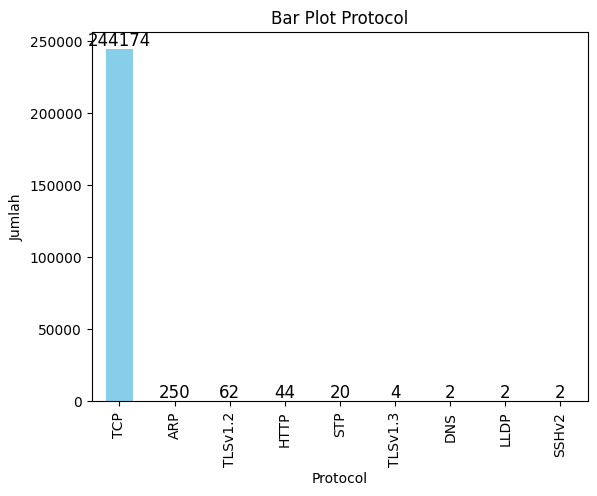

In [ ]:
label_counts = filtered_data['Protocol'].value_counts()
label_counts.plot(kind='bar', color='skyblue')

ax = label_counts.plot(kind='bar', color='skyblue')

for i, v in enumerate(label_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('Protocol')
plt.ylabel('Jumlah')
plt.title('Bar Plot Protocol')

plt.show()

# **TCP DUP ACK**

Situasi dimana "TCP Dup ACK" terjadi ketika penerima menerima paket-paket TCP yang tiba dalam urutan yang salah, atau saat beberapa paket hilang dalam perjalanan.

digunakan untuk mengelompokkan (grouping) data yang sudah difilter berdasarkan kriteria tertentu.

In [ ]:
grouped_data = filtered_data.groupby(filtered_data['Info'].str.contains('TCP Dup ACK', case = False, na = False).cumsum())

 untuk menghitung jumlah grup yang telah dihasilkan dari proses pengelompokkan (grouping) yang dilakukan sebelumnya

In [ ]:
jumlah_dup = len(grouped_data)
print(f'Jumlah lintas jaringan yang mengalami dup sebanyak: {jumlah_dup}')

Jumlah lintas jaringan yang mengalami dup sebanyak: 175564


langkah-langkah untuk menambahkan kolom baru yang disebut 'Label' ke dalam DataFrame filtered_data berdasarkan hasil dari pencarian string "TCP Dup ACK" dalam kolom 'Info'.

In [ ]:
grouped_data = filtered_data['Info'].str.contains('TCP Dup ACK', case = False, na = False).astype(int)
filtered_data['Label'] = grouped_data

<ipython-input-20-b03bef53dbeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Label'] = grouped_data


In [ ]:
filtered_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Label
11,12,0.012721,172.217.194.95,10.10.1.198,TCP,80,443 > 59620 [ACK] Seq=1 Ack=4293526301 Win=1...,0
13,14,0.013069,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 12#1] 443 > 59620 [ACK] Seq=1 A...,1
14,15,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#2] 443 > 59620 [ACK] Seq=1 A...,1
15,16,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#3] 443 > 59620 [ACK] Seq=1 A...,1
16,17,0.013069,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 12#4] 443 > 59620 [ACK] Seq=1 A...,1


In [ ]:
filtered_data.tail()

,No.,Time,Source,Destination,Protocol,Length,Info,Label
253648,253649,40.162614,HuaweiTe_c2:52:3b,10.10.1.198,ARP,62,Who has 10.10.1.13? Tell 10.10.1.88,0
253649,253650,40.282122,VMware_bf:e2:b7,10.10.1.198,ARP,62,Who has 10.10.1.13? Tell 10.10.1.48,0
253671,253672,40.336219,172.217.194.95,10.10.1.198,TCP,80,[TCP Dup ACK 253644#1] 443 > 59620 [ACK] Seq...,1
253672,253673,40.336219,172.217.194.95,10.10.1.198,TCP,88,[TCP Dup ACK 253644#2] 443 > 59620 [ACK] Seq...,1
253673,253674,40.336219,172.217.194.95,10.10.1.198,TCP,96,[TCP Dup ACK 253644#3] 443 > 59620 [ACK] Seq...,1


Kode dibawah digunakan untuk membuat subplot pertama dari suatu figure yang lebih besar. Subplot ini merupakan histogram dari kolom 'Label' dalam DataFrame filtered_data

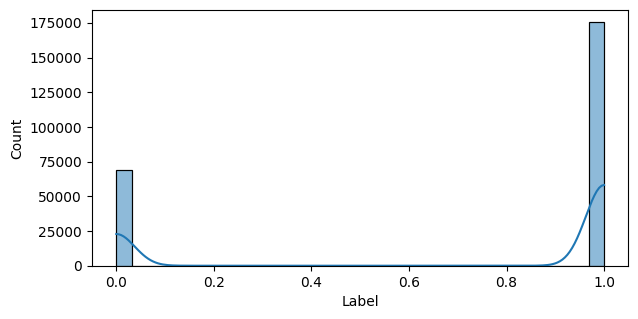

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=filtered_data, x="Label", kde=True)
plt.tight_layout()
plt.show()


Kode ini membuat diagram batang yang menunjukkan jumlah koneksi dengan nilai 'Label' yang sama pada DataFrame filtered_data.

<ipython-input-24-e3ceb0271a60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Label'] = grouped_data


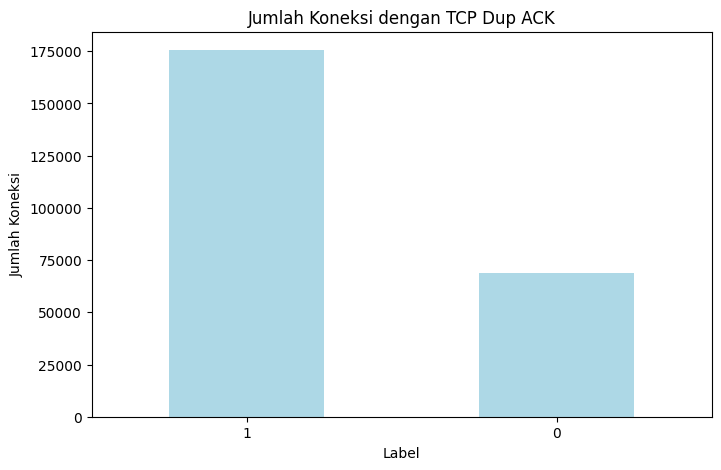

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah 'Label' yang memiliki nilai 1 dan 0
filtered_data['Label'] = grouped_data
label_counts = filtered_data['Label'].value_counts()

# Buat bar chart
plt.figure(figsize=(8, 5))  # Tentukan ukuran grafik
label_counts.plot(kind='bar', color='lightblue')
plt.title('Jumlah Koneksi dengan TCP Dup ACK')
plt.xlabel('Label')
plt.ylabel('Jumlah Koneksi')
plt.xticks(rotation=0)  # Membuat label x-axis lebih mudah dibaca
plt.show()



# **MODELLING**

import xgboost as xgb: Baris ini mengimpor modul XGBoost. XGBoost adalah sebuah pustaka (library) yang digunakan untuk pemodelan dan analisis data, terutama untuk tugas klasifikasi dan regresi. XGBoost sering digunakan karena keefektifannya dalam membangun model yang kuat.

from sklearn.model_selection import train_test_split: Baris ini mengimpor fungsi train_test_split dari modul model_selection di library scikit-learn. Fungsi ini digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian, memudahkan proses evaluasi model.

from sklearn.metrics import accuracy_score, classification_report: Baris ini mengimpor beberapa metrik evaluasi dari modul metrics di library scikit-learn. accuracy_score digunakan untuk mengukur akurasi model, sementara classification_report memberikan laporan klasifikasi yang melibatkan precision, recall, dan f1-score.

from sklearn.preprocessing import LabelEncoder: Baris ini mengimpor kelas LabelEncoder dari modul preprocessing di library scikit-learn. LabelEncoder digunakan untuk mengonversi label kategori menjadi bentuk numerik, yang diperlukan oleh banyak algoritma pembelajaran mesin, termasuk XGBoost.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244560 entries, 11 to 253673
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          244560 non-null  int64  
 1   Time         244560 non-null  float64
 2   Source       244560 non-null  object 
 3   Destination  244560 non-null  object 
 4   Protocol     244560 non-null  object 
 5   Length       244560 non-null  int64  
 6   Info         244560 non-null  object 
 7   Label        244560 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 16.8+ MB


In [ ]:
filtered_data.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
Label          0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", data_jaringan.duplicated().sum())

Jumlah duplikasi:  0


code dibawah ini berguna ketika kita memiliki data kategorikal dalam format string dan kita ingin menggunakan model pembelajaran mesin yang memerlukan input dalam bentuk numerik. Dengan mengonversi nilai-nilai dalam kolom kategorikal menjadi nilai numerik, kita memungkinkan algoritma pembelajaran mesin, seperti XGBoost, untuk memproses dan memahami data tersebut. Perlu dicatat bahwa fit_transform dilakukan terpisah untuk setiap kolom agar masing-masing kolom memiliki pemetaan numerik yang sesuai dengan kategori di dalamnya.

In [ ]:
labelencoder = LabelEncoder()
filtered_data['Source'] = labelencoder.fit_transform(filtered_data['Source'])
filtered_data['Destination'] = labelencoder.fit_transform(filtered_data['Destination'])
filtered_data['Protocol'] = labelencoder.fit_transform(filtered_data['Protocol'])
filtered_data['Info'] = labelencoder.fit_transform(filtered_data['Info'])

<ipython-input-29-0786b720bc9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Source'] = labelencoder.fit_transform(filtered_data['Source'])
<ipython-input-29-0786b720bc9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Destination'] = labelencoder.fit_transform(filtered_data['Destination'])
<ipython-input-29-0786b720bc9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244560 entries, 11 to 253673
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          244560 non-null  int64  
 1   Time         244560 non-null  float64
 2   Source       244560 non-null  int64  
 3   Destination  244560 non-null  int64  
 4   Protocol     244560 non-null  int64  
 5   Length       244560 non-null  int64  
 6   Info         244560 non-null  int64  
 7   Label        244560 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 16.8 MB


Pisahan dibawah ini umum dalam pemodelan pembelajaran mesin. Variabel X digunakan untuk menyimpan fitur-fitur atau atribut-atribut yang akan digunakan untuk membuat prediksi, sementara variabel y menyimpan target atau label yang akan diprediksi. Dengan cara ini, kita dapat menggunakan variabel X sebagai input untuk melatih model dan variabel y sebagai output yang diharapkan untuk melatih model tersebut.

In [ ]:
X = filtered_data.drop("Label", axis=1)  # Asumsi "Label" adalah kolom yang berisi destination klasifikasi
y = filtered_data["Label"]

In [ ]:
# Membagi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Random Forest

model = xgb.XGBClassifier(n_estimators=100, random_state=42)

In [ ]:
# melatih model dengan data latih

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Melakukan predeksi menggunakan data uji

y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model dengan menghitung akurasi atau menggunakan metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 100.00%


Laporan klasifikasi dibawah ini digunakan untuk mengevaluasi seberapa baik model klasifikasi telah melakukan prediksi pada set data pengujian. Ini membantu dalam pemahaman kinerja model, terutama dalam konteks klasifikasi biner atau multikelas, dengan memberikan informasi tentang seberapa baik model dapat membedakan antara kelas positif dan kelas negatif.

In [ ]:
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13789
           1       1.00      1.00      1.00     35123

    accuracy                           1.00     48912
   macro avg       1.00      1.00      1.00     48912
weighted avg       1.00      1.00      1.00     48912

